In [ ]:
!pip install tensorflow
!pip install keras
!pip install scikit-learn

In [ ]:
root_dir = "/content"
runtime_dir = !pwd
if runtime_dir[0] != root_dir:
    raise Exception("Runtime folder does not match root folder.")
!rm -rf *

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras.layers import BatchNormalization
import os
import tensorflow as tf
from keras.callbacks import EarlyStopping
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
!curl -u leprieto:fnnXN-KRkr9-dWJqy-x2GEE-E3P5N -o 00_dataset.zip "https://cloud.leonprieto.com/remote.php/dav/files/leprieto/University/UEM/TFM/resources/00_clean_filtered_dataset/dataset.zip"
!unzip -q 00_dataset.zip -d 00_dataset
!rm 00_dataset.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  198M  100  198M    0     0  17.6M      0  0:00:11  0:00:11 --:--:-- 21.4M


In [ ]:
IMG_SIZE = (300, 300)
BATCH_SIZE = 32
EPOCHS = 100
DATA_DIR = '00_dataset/dataset/casting_data/casting_data/train/'

train_dataset, val_dataset = image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="both",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='binary'
)

class_names = train_dataset.class_names
print(f"Classes: {class_names}")
print(f"Training samples: {train_dataset.cardinality().numpy() * BATCH_SIZE}")
print(f"Validation samples: {val_dataset.cardinality().numpy() * BATCH_SIZE}")

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomContrast(0.1)
])

preprocess = tf.keras.Sequential([
    layers.Rescaling(1./255)
])

model = models.Sequential([
  layers.Input(shape=IMG_SIZE + (3,)),
    data_augmentation,
    preprocess,

    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

labels = np.concatenate([y for x, y in train_dataset], axis=0)
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(labels),
    y=labels.flatten()
)
class_weights = {i: w for i, w in enumerate(class_weights)}

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    keras.callbacks.ModelCheckpoint("model.weights.h5",
                                    monitor='val_loss',
                                    save_best_only=True,
                                    save_weights_only=True),
]

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=EPOCHS,
    class_weight=class_weights,
    callbacks=callbacks
)

model.load_weights("model.weights.h5")
loss, accuracy= model.evaluate(val_dataset)
print(f"\nValidation Accuracy: {accuracy*100:.2f}%")

train_loss = history.history['loss']
val_loss = history.history['val_loss']
print(f"Loss {train_loss}")
print(f"Validation Loss: {val_loss}")

Found 6569 files belonging to 2 classes.
Using 5256 files for training.
Using 1313 files for validation.
Classes: ['def_front', 'ok_front']
Training samples: 5280
Validation samples: 1344
Epoch 1/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 24s 94ms/step - accuracy: 0.5009 - loss: 0.8525 - val_accuracy: 0.6931 - val_loss: 0.5485
Epoch 2/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 34s 90ms/step - accuracy: 0.6807 - loss: 0.5595 - val_accuracy: 0.8065 - val_loss: 0.4583
Epoch 3/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 17s 102ms/step - accuracy: 0.7699 - loss: 0.4566 - val_accuracy: 0.8621 - val_loss: 0.2907
Epoch 4/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 20s 96ms/step - accuracy: 0.8317 - loss: 0.3453 - val_accuracy: 0.9040 - val_loss: 0.2230
Epoch 5/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.8593 - loss: 0.3022 - val_accuracy: 0.9589 - val_loss: 0.1709
Epoch 6/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.8698 - loss: 0.2790 - val_accuracy: 0.9749 - val_loss: 0.1103
Epoch 7/100
165/165 ━━━━━

Found 715 files belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━

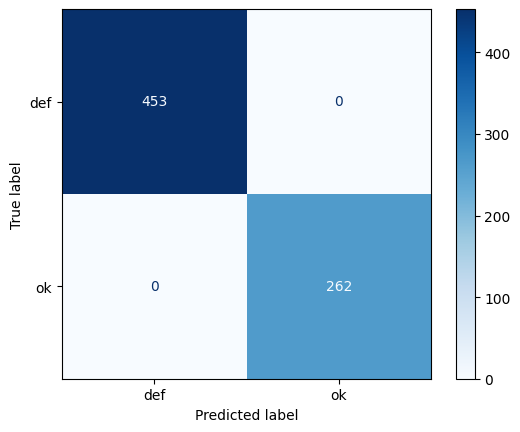

              precision    recall  f1-score   support

         def       1.00      1.00      1.00       453
          ok       1.00      1.00      1.00       262

    accuracy                           1.00       715
   macro avg       1.00      1.00      1.00       715
weighted avg       1.00      1.00      1.00       715



In [ ]:
test_dataset = image_dataset_from_directory(
    '00_dataset/dataset/casting_data/casting_data/test/',
    seed=42,
    image_size=IMG_SIZE,
    batch_size=1,
    label_mode='binary'
)

true_labels = []
predictions = []
for images, labels in test_dataset:
    true_labels.extend(labels.numpy())
    batch_pred = model.predict(images)
    predictions.extend((batch_pred > 0.5).astype(int).flatten())

true_labels = np.array(true_labels)
predictions = np.array(predictions)

cm = confusion_matrix(true_labels, predictions, labels=[0, 1])
cm_display = ConfusionMatrixDisplay(cm, display_labels=['def', 'ok'])
report = classification_report(true_labels, predictions, target_names=['def', 'ok'])
cm_display.plot(cmap=plt.cm.Blues)
plt.savefig("confusion_matrix.svg")
plt.show()
print(report)